In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
from plot_utils import extract_rewards_from_run_dir, eval_random_agent
import pandas as pd
result_dirs = {
        "CARLCartPoleContinuous" : ["results/hydra/multirun/2024-02-08/13-15-57","tau", [0.002     , 0.0033362 , 0.00556512, 0.00928318, 0.01548527, 0.02583099, 0.04308869, 0.07187627, 0.11989685, 0.2       ], 200],
        "CARLBraxAnt": ["results/hydra/multirun/2024-02-07/20-31-42","mass_torso",[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 1000],
        "CARLMountainCarContinuous"  : ["results/hydra/multirun/2024-02-09/18-52-53","power", [0.00015   , 0.00025022, 0.00041738, 0.00069624, 0.0011614 , 0.00193732, 0.00323165, 0.00539072, 0.00899226, 0.015     ],999],#[-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10], 999],
        "CARLPendulum" : ["results/hydra/multirun/2024-02-09/13-33-44","l", [ 0.01      ,  0.02154435,  0.04641589,  0.1       ,  0.21544347,   0.46415888,  1.        ,  2.15443469,  4.64158883, 10.        ], 200]
}
                                         
# measure performance of a random agent

random_performance_df = pd.DataFrame(columns=["Environment", "context_value", "reward"])
for env_name, (dir, context_name, context_values, max_steps) in result_dirs.items():
    for context_value in context_values:
        random_performance = eval_random_agent(env_name, context_name, context_value, max_steps)
        random_performance_df = random_performance_df._append({"Environment": env_name, "context_value": context_value, "reward": random_performance}, ignore_index=True)
        print(f"Random performance for {env_name} with context value {context_value} is {random_performance}")
random_performance_df.to_csv("plots/random_performance.csv", index=False)
"""
# load it back
random_performance_df = pd.read_csv("plots/random_performance.csv")
"""

env_name :  CARLCartPoleContinuous


/home/ndirt/.local/lib/python3.10/site-packages/glfw/__init__.py:916: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)
/tmp/ipykernel_554529/3945481332.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  random_performance_df = random_performance_df._append({"Environment": env_name, "context_value": context_value, "reward": random_performance}, ignore_index=True)


Random performance for CARLCartPoleContinuous with context value 0.002 is 194.14
env_name :  CARLCartPoleContinuous
Random performance for CARLCartPoleContinuous with context value 0.0033362 is 150.92
env_name :  CARLCartPoleContinuous
Random performance for CARLCartPoleContinuous with context value 0.00556512 is 102.76
env_name :  CARLCartPoleContinuous
Random performance for CARLCartPoleContinuous with context value 0.00928318 is 58.32
env_name :  CARLCartPoleContinuous
Random performance for CARLCartPoleContinuous with context value 0.01548527 is 41.38
env_name :  CARLCartPoleContinuous
Random performance for CARLCartPoleContinuous with context value 0.02583099 is 18.34
env_name :  CARLCartPoleContinuous
Random performance for CARLCartPoleContinuous with context value 0.04308869 is 11.14
env_name :  CARLCartPoleContinuous
Random performance for CARLCartPoleContinuous with context value 0.07187627 is 6.28
env_name :  CARLCartPoleContinuous
Random performance for CARLCartPoleContinuou

'\n# load it back\nrandom_performance_df = pd.read_csv("plots/random_performance.csv")\n'

In [15]:
random_performance_df

,Environment,context_value,reward
0,CARLCartPoleContinuous,0.002000,194.140000
1,CARLCartPoleContinuous,0.003336,150.920000
2,CARLCartPoleContinuous,0.005565,102.760000
3,CARLCartPoleContinuous,0.009283,58.320000
4,CARLCartPoleContinuous,0.015485,41.380000
5,CARLCartPoleContinuous,0.025831,18.340000
6,CARLCartPoleContinuous,0.043089,11.140000
7,CARLCartPoleContinuous,0.071876,6.280000
8,CARLCartPoleContinuous,0.119897,3.980000
9,CARLCartPoleContinuous,0.200000,2.480000


In [2]:
intra_extra = {
        "CARLCartPoleContinuous" : {"intra":[  0.00928318, 0.01548527, 0.02583099, 0.04308869,], "extra":[0.002     , 0.0033362 , 0.00556512, 0.07187627, 0.11989685, 0.2 ]},
        "CARLBraxAnt": {"intra":[30, 40, 50, 60, 70,], "extra":[1, 10, 20, 80, 90, 100]},
        "CARLMountainCarContinuous"  : {"intra":[-4, -2, 0, 2, 4], "extra":[-10, -8, -6,6, 8, 10]},
        "CARLPendulum" : {"intra":[ 0.1       ,  0.21544347,   0.46415888,  1.      ], "extra":[0.01      ,  0.02154435,  0.04641589, 2.15443469,  4.64158883, 10.]},
}


In [ ]:
random_performance_df

In [10]:

# concat all rewards, normalize using random and default agents
df_list = []
import os
print(os.getcwd())
for env, (dir, _, _, _)  in result_dirs.items():
    print(f"Environment: {env}")
    # replace dir by ../dir
    dir = os.path.join("..", dir)
    reward_df = extract_rewards_from_run_dir(dir, environment_name=env)
    # normalize the rewards
    # loop over context_mode and context_values
    for context_value in reward_df["context_value"].unique():
        default_performance = reward_df[(reward_df["context_mode"] == "default") & (reward_df["context_value"] == context_value)]["reward"]
        default_performance = default_performance.mean()
        for context_mode in reward_df["context_mode"].unique():
            # find the random performance for this context
            # Create boolean masks for the conditions
            condition_mask = (reward_df["context_mode"] == context_mode) & (reward_df["context_value"] == context_value)
            print(reward_df.loc[condition_mask, "reward"].mean())
            random_performance = random_performance_df[(random_performance_df["Environment"] == env) & (random_performance_df["context_value"] == float(context_value))]["reward"].values[0]
            # Apply the conditions and perform the calculation
            
            #print(reward_df.loc[condition_mask, "reward"])
            normalized_reward = (reward_df.loc[condition_mask, "reward"] - random_performance) / (default_performance - random_performance)
            reward_df.loc[condition_mask, "reward"] = normalized_reward
    reward_df["Environment"] = env
    df_list.append(reward_df)

reward_df = pd.concat(df_list)




/home/ndirt/dev/automl/meta_rl/scripts
Environment: CARLCartPoleContinuous


/home/ndirt/dev/automl/meta_rl/scripts/plot_utils.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reward_df = reward_df._append(


200.0
200.0
200.0
200.0
198.125
200.0
200.0
199.395
200.0
193.0
200.0
200.0
200.0
197.8
195.07
199.855
199.99
200.0
197.09
197.59
192.395
192.945
199.995
197.12
191.35
178.225
161.95
184.72
178.495
199.52
136.195
128.23
147.985
186.035
195.86
82.215
75.565
113.765
173.835
128.115
13.175
24.065
47.655
84.71
32.73
2.375
2.36
2.795
2.455
2.14
Environment: CARLBraxAnt


/home/ndirt/dev/automl/meta_rl/scripts/plot_utils.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reward_df = reward_df._append(


454.43271549867467
454.43271549867467
419.870846635364
461.7566590550542
-633.091410921961
474.9292696077563
474.9292696077563
416.64873750412835
456.45330531833696
-440.1867258366942
451.9480380152538
451.9480380152538
393.57897428106514
455.0080293149687
-196.19981092158704
447.72787499370054
447.72787499370054
380.85631187586114
448.85009704196824
-37.82045036587864
461.81083298942076
461.81083298942076
385.61435882890595
444.14189621407536
66.68806415189057
433.9287352912314
433.9287352912314
405.0452687506378
460.29202936982733
284.7272433869168
466.1178940878436
466.1178940878436
412.0019764813408
476.8004535839707
443.9133575842902
462.9754073559493
462.9754073559493
399.7007896199077
424.86356193413957
439.02373697780075
423.96018477950247
423.96018477950247
408.47699970964345
456.3576498636836
322.42398278355597
458.4101246099919
458.4101246099919
382.94147204715756
464.405499302391
224.34934161853045
447.7594266895019
447.7594266895019
386.5678535270877
484.1125234508887
100.

/home/ndirt/dev/automl/meta_rl/scripts/plot_utils.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reward_df = reward_df._append(


90.73133705242944
18.782704794890268
41.67732305543349
62.140808727719474
99.68027389261987
86.7136203210101
23.18055241540541
42.86511801623855
66.58501614076555
99.7260141987022
89.21995419284778
20.953925879655667
41.25270282479425
65.54215319985293
99.77323162496805
89.74303106897554
15.247726770045187
40.71711103132825
64.06309746666446
99.80071697637308
91.25480677399344
20.211092174997635
42.80978750125294
64.87031842173727
99.8161256646706
-0.7962212753194048
-2.962812634529825
-10.855284115327665
-10.157931295611041
-1.437131339009887
49.96944627381876
10.833107629070344
39.45750817468429
76.66998753234509
99.79172745280961
44.920270558458405
9.89764589618901
33.365379213069474
76.70785921799138
99.82366736830268
45.42527235967047
9.827784935170332
32.10972422217121
76.81722915216933
99.79383991147871
42.912835115714145
10.270412253481094
30.73870798868068
76.74585829767948
99.76852663681744
45.429245000510626
9.70798147907906
31.215484681343277
76.78024263028391
99.1902217095

/home/ndirt/dev/automl/meta_rl/scripts/plot_utils.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reward_df = reward_df._append(


-2183.036301691341
-1308.513229555098
-1320.142252955042
-1325.4987183287542
-1306.2365152179786
-2035.7801584625572
-1306.4983520194628
-1313.3413578073773
-1323.2438738894007
-1305.602175512451
-2124.544871632767
-1287.358149282672
-1273.8211827415878
-1231.0969484837374
-1253.4832276134268
-1989.186869731359
-58.81701272776533
-106.91494338157386
-107.57671818253115
-44.27257053773871
-2040.6228624600317
-98.8297717452299
-51.01119746760596
-68.2703108890129
-45.612144013999966
-163.30037627444423
-652.0738931999615
-646.0811904297229
-98.57456494622343
-194.57664418309506
-155.5327011072118
-948.4231559097246
-981.950796955908
-180.16404517363029
-210.35109066139208
-863.9493674277443
-954.1832013694232
-984.1390311372693
-761.8534519367372
-790.5870473585798
-897.856982797151
-966.6862118436486
-954.2982924814621
-913.7390789106473
-1028.8831718855515
-928.820440475905
-900.5353024581381
-908.7150532157885
-904.8368742048148
-951.2073448530081


In [4]:
# loop over rows in reward_df
def get_intra_extra_label(row):
    env = row["Environment"]
    context_value = float(row["context_value"])

    if context_value in intra_extra[env]["intra"]:
        return "intra"
    elif context_value in intra_extra[env]["extra"]:
        return "extra"
    else:
        raise ValueError(f"Context value {context_value} is not in either intra or extra for environment {env}")
# Apply the function to each row along the axis
reward_df["intra_extra"] = reward_df.apply(get_intra_extra_label, axis=1)
        
reward_df["intra_extra"].value_counts()

intra_extra
extra    24000
intra    18000
Name: count, dtype: int64

In [49]:
# change the context_mode values : learned_jrpc -> jcpl, learned_iida -> predictive_id
reward_df["context_mode"] = reward_df["context_mode"].replace({"learned_jrpl": "jcpl", "learned_iida": "predictive_id"})

In [50]:
filtered_reward_df = reward_df
filtered_reward_df = filtered_reward_df[filtered_reward_df["context_mode"].isin(["explicit", "hidden", "jcpl", "predictive_id"])]
filtered_reward_df = filtered_reward_df[filtered_reward_df["Environment"] == "CARLBraxAnt"]
#filtered_reward_df = filtered_reward_df[filtered_reward_df["intra_extra"] == "extra"]

In [51]:
reward_df["Environment"].unique()

array(['CARLCartPoleContinuous', 'CARLBraxAnt',
       'CARLMountainCarContinuous', 'CARLPendulum'], dtype=object)

In [52]:
import numpy as np
# put scores in a dict of shape {context_mode: np.array(n_seeds, n_envs)}
algo_scores = {}
for context_mode in filtered_reward_df["context_mode"].unique():
    # get a numpy array of the scores for each algorithm, of shape (n_seeds, n_envs)
    unique_context_values = list(filtered_reward_df[filtered_reward_df["context_mode"] == context_mode]["context_value"].unique())
    scores = []
    for context_value in unique_context_values:
        scores_context_value = filtered_reward_df[(filtered_reward_df["context_mode"] == context_mode) & (filtered_reward_df["context_value"] == context_value)]["reward"].values
        scores.append(scores_context_value)
    scores = np.array(scores)
    algo_scores[context_mode] = scores

for context_mode, scores in algo_scores.items():
    print(f"Context mode: {context_mode}")
    print(f"score shape: {scores.shape}")
    #print(scores)

Context mode: hidden
score shape: (11, 200)
Context mode: predictive_id
score shape: (11, 200)
Context mode: jcpl
score shape: (11, 200)
Context mode: explicit
score shape: (11, 200)


In [53]:
from rliable import library as rly
from rliable import metrics
from rliable import plot_utils
import numpy as np

colors =  (125, 84, 178, 1), (218, 76, 76, 1),(71,154,95,1), (237, 183, 50, 1)#, (83, 135, 221, 1)
# inverse order of the colors
colors = colors[::-1]
# need to divide by 255 to get the right colors
colors = [(r/255, g/255, b/255, a) for r, g, b, a in colors]


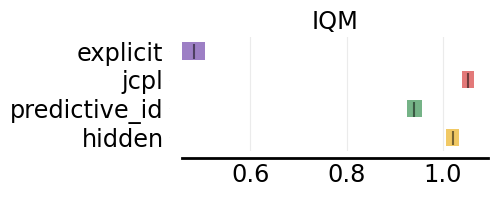

In [54]:
## Aggregate metrics with 95% Stratified Bootstrap CIs

# Load ALE scores as a dictionary mapping algorithms to their human normalized
# score matrices, each of which is of size `(num_runs x num_games)`
algorithms = list(algo_scores.keys())

aggregate_func = lambda x: np.array([
  #metrics.aggregate_median(x),
  metrics.aggregate_iqm(x),
  #metrics.aggregate_mean(x),
  #metrics.aggregate_optimality_gap(x)
])
aggregate_scores, aggregate_score_cis = rly.get_interval_estimates(
  algo_scores, aggregate_func, reps=50000)
fig, axes = plot_utils.plot_interval_estimates(
  aggregate_scores, aggregate_score_cis,
  #metric_names=['Median', 'IQM', 'Mean', 'Optimality Gap'],
  metric_names=['IQM',],
  algorithms=algorithms, xlabel='',
  colors=dict(zip(algorithms, colors)))

In [55]:
aggregate_scores

{'hidden': array([1.02004102]),
 'predictive_id': array([0.94079416]),
 'jcpl': array([1.05176825]),
 'explicit': array([0.48219734])}

<Axes: xlabel='P(X > Y)', ylabel='Algorithm X'>

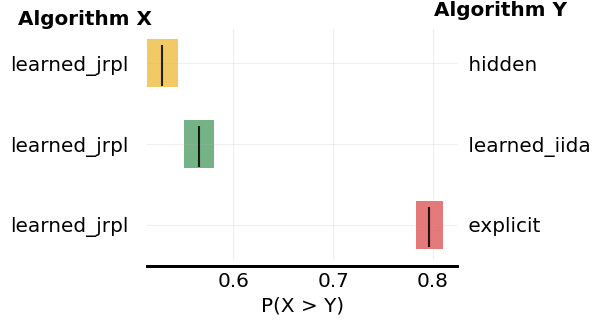

In [35]:
# Probability of Improvement

# Load ProcGen scores as a dictionary containing pairs of normalized score
# matrices for pairs of algorithms we want to compare


"""
num_runs, num_games = 10, 10
algorithm_pairs = {algo_pair: (np.random.rand(num_runs, num_games),
                                        np.random.rand(num_runs, num_games))
                            for algo_pair in [('DQN (Nature), DQN (Adam)'),
                                                ('C51, REM'), ('Rainbow, IQN')]}
"""
# Probability of Improvement

# Load ProcGen scores as a dictionary containing pairs of normalized score
# matrices for pairs of algorithms we want to compare
algorithm_pairs = {a1 + ', ' + a2: (algo_scores[a1], algo_scores[a2])
                    for a1, a2 in [('learned_jrpl', 'explicit'),
                                    ('learned_jrpl', 'learned_iida'),
                                    ('learned_jrpl','hidden')
                                    ]}
average_probabilities, average_prob_cis = rly.get_interval_estimates(
  algorithm_pairs, metrics.probability_of_improvement, reps=2000)
plot_utils.plot_probability_of_improvement(average_probabilities, average_prob_cis, colors = [colors[2], colors[1], colors[0]])


In [36]:
print(average_probabilities, average_prob_cis)

{'learned_jrpl, explicit': 0.7964462809917354, 'learned_jrpl, learned_iida': 0.5652066115702479, 'learned_jrpl, hidden': 0.5281818181818182} {'learned_jrpl, explicit': array([[0.7830155 ],
       [0.80967045]]), 'learned_jrpl, learned_iida': array([[0.55032955],
       [0.58045455]]), 'learned_jrpl, hidden': array([[0.51350826],
       [0.54392975]])}


<Axes: xlabel='Human Normalized Score $(\\tau)$', ylabel='Fraction of runs with score $> \\tau$'>

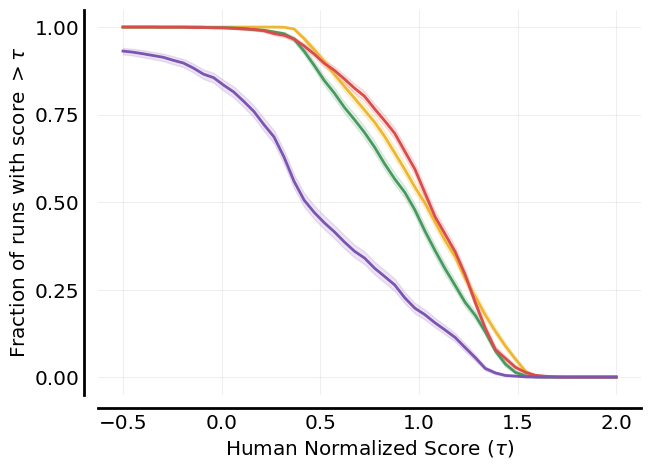

In [39]:
## Performance Profiles
import matplotlib.pyplot as plt
import seaborn as sns
# Load ALE scores as a dictionary mapping algorithms to their human normalized
# score matrices, each of which is of size `(num_runs x num_games)`.

# Human normalized score thresholds
atari_200m_thresholds = np.linspace(-0.5,2, 50)
score_distributions, score_distributions_cis = rly.create_performance_profile(
    algo_scores, atari_200m_thresholds)
# Plot score distributions
fig, ax = plt.subplots(ncols=1, figsize=(7, 5))
plot_utils.plot_performance_profiles(
  score_distributions, atari_200m_thresholds,
  performance_profile_cis=score_distributions_cis,
  colors=dict(zip(algorithms, colors)),
  xlabel=r'Human Normalized Score $(\tau)$',
  ax=ax)

In [20]:
import pandas as pd
# read results/eval_metrics_2/stats.csv
df = pd.read_csv("../results/eval_metrics_2/stats.csv")
df = df[df["metric"] == "IQM"]
df = df[df['Environment'] == "CARLMountainCarContinuous"] # CARLCartPoleContinuous, CARLMountainCarContinuous, CARLPendulum, CARLBraxAnt
df = df[df['context_mode'].isin(["jcpl", "predictive_id"])]
# sort by context_mode
df = df.sort_values(by="context_mode")
# sort context_range in the order "intra", "extra", "all"
print(df)

                  Environment   context_mode context_range metric     value
21  CARLMountainCarContinuous           jcpl           all    IQM  0.091731
28  CARLMountainCarContinuous           jcpl         intra    IQM  0.320692
35  CARLMountainCarContinuous           jcpl         extra    IQM -0.123045
22  CARLMountainCarContinuous  predictive_id           all    IQM  0.588501
29  CARLMountainCarContinuous  predictive_id         intra    IQM  0.578874
36  CARLMountainCarContinuous  predictive_id         extra    IQM  0.553004
